# Project 0.1: Train a single perceptron on a new binary task. 

Create a single perceptron with trainable weights and bias and test it against a binary classification task using the digits 0 and 1 of the MNIST dataset.
* Explore different activation functions discussed during the tutorial. 
* Explore the effect of learning rate on the speed of learning.


In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from keras.datasets import mnist

import time

A perceptron would have the following structure:

* The weights
* The bias
* "The pre-activation"
* The activation function

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filter the training data to only include 0s and 1s
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]

# Filter the test data to only include 0s and 1s
X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

In [3]:
# check the numbr of images
len(X_train), len(y_train)

(12665, 12665)

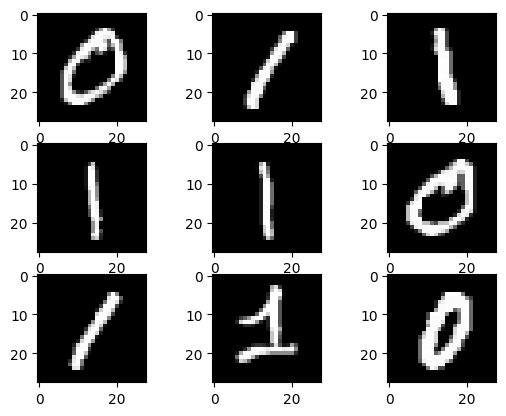

In [4]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [5]:
# define the activation functions to try

def heaviside(x, theta, derivative = False):
    if derivative:
        return np.ones_like(x)
    return np.where(x >= theta, 1, 0)

def sigmoid(x, derivative = False):
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if derivative:
        return 1 - np.square(tanh(x))
    return np.tanh(x)

def relu(x, derivative = False):
    if derivative:
        return np.where(x >= 0, 1, 0)
    return np.maximum(x, 0)

In [6]:
# define the error function

def squared_error(prediction, target, derivative=False):
    if derivative:
        return -2*(target - prediction)
    return np.square(target - prediction)

In [7]:
# define a class for a perceptron

class Perceptron():
    def __init__(self, input_size, **kwargs):
        self.weight_init                    = kwargs.get('weight_init', 0)
        self.weights                        = np.ones((input_size, )) *self.weight_init
        self.bias                           = kwargs.get('bias', 0)
        self.activation_function            = kwargs.get('activation_fn', sigmoid)
        self.threshold                      = kwargs.get('threshold', 0)
        self.loss_function                  = kwargs.get("loss_fn", squared_error)
        
    def forward(self, input_vector):
        pre_activation = self.weights @ input_vector.T + self.bias
        if self.activation_function == heaviside:
            output_vector = self.activation_function(pre_activation, theta=self.threshold)
        else:
            output_vector = self.activation_function(pre_activation)
            
        return output_vector
    
    def train(self, X_train, y_train, learning_rate, num_epcohs):
        self.loss                           = []
        self.weight_vals                    = [[] for n in range(len(self.weights))]
        self.bias_vals                      = [] 
        
        for epoch in range(num_epcohs):
            
            error = 0
            
            for i in range(len(X_train)):
                prediction  = self.forward(X_train[i].flatten())
                
                error += self.loss_function(prediction, y_train[i])
                
                grad_loss = self.loss_function(prediction, y_train[i], derivative=True)
                
                if self.activation_function == heaviside:
                    grad_act_function = self.activation_function(prediction, theta = self.threshold, derivative=True)
                else:
                    grad_act_function = self.activation_function(prediction, derivative=True)
                
                self.weights -= learning_rate * grad_loss * grad_act_function * X_train[i].flatten()
                self.bias    -= learning_rate * grad_loss * grad_act_function
                
            for ind in range(len(self.weights)):
                self.weight_vals[ind].append(self.weights[ind])
            self.bias_vals.append(self.bias)
            self.loss.append(error/len(X_train))
        

Exploring Different Activation Functions

In [8]:
X_train.shape

(12665, 28, 28)

In [9]:
perceptron_heaviside = Perceptron(input_size = 784, threshold = 0, activation_fn = heaviside)
perceptron_sigmoid = Perceptron(input_size=784, activation_fn = sigmoid)
perceptron_tanh = Perceptron(input_size=784, activation_fn = tanh)
perceptron_relu = Perceptron(input_size=784, activation_fn = relu)

epochs = 50
lr = 0.001

print(f'Training Perceptron with Heaviside Activation Function...')
perceptron_heaviside.train(X_train, y_train, learning_rate=lr, num_epcohs=epochs)

print(f'Training Perceptron with Sigmoid Activation Function...')
perceptron_sigmoid.train(X_train, y_train, learning_rate=lr, num_epcohs=epochs)

print(f'Training Perceptron with TanH Activation Function...')
perceptron_tanh.train(X_train, y_train, learning_rate=lr, num_epcohs=epochs)

print(f'Training Perceptron with ReLu Activation Function...')
perceptron_relu.train(X_train, y_train, learning_rate=lr, num_epcohs=epochs)

print("Done!")

Training Perceptron with Heaviside Activation Function...
Training Perceptron with Sigmoid Activation Function...


C:\Users\Cyril\AppData\Local\Temp\ipykernel_21556\330012590.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Training Perceptron with TanH Activation Function...
Training Perceptron with ReLu Activation Function...
Done!


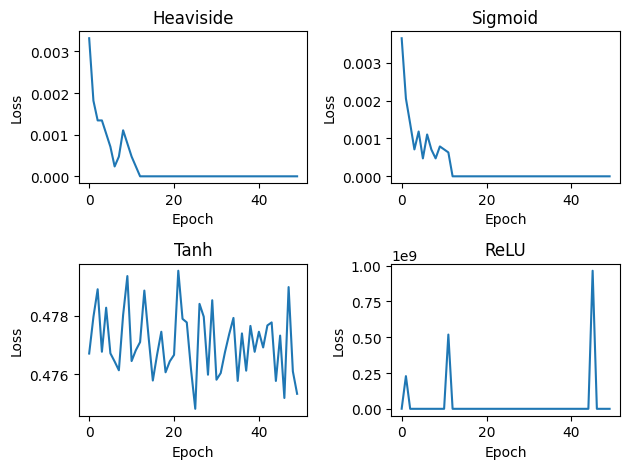

In [10]:
fig, ax = plt.subplots(2, 2)

ax[0][0].plot(perceptron_heaviside.loss)
ax[0][0].set_xlabel('Epoch')
ax[0][0].set_ylabel('Loss')
ax[0][0].set_title('Heaviside')

ax[0][1].plot(perceptron_sigmoid.loss)
ax[0][1].set_xlabel('Epoch')
ax[0][1].set_ylabel('Loss')
ax[0][1].set_title('Sigmoid')

ax[1][0].plot(perceptron_tanh.loss)
ax[1][0].set_xlabel('Epoch')
ax[1][0].set_ylabel('Loss')
ax[1][0].set_title('Tanh')

ax[1][1].plot(perceptron_relu.loss)
ax[1][1].set_xlabel('Epoch')
ax[1][1].set_ylabel('Loss')
ax[1][1].set_title('ReLU')

plt.tight_layout()
plt.show()


Effect of Learning Rate on the Speed of Learning

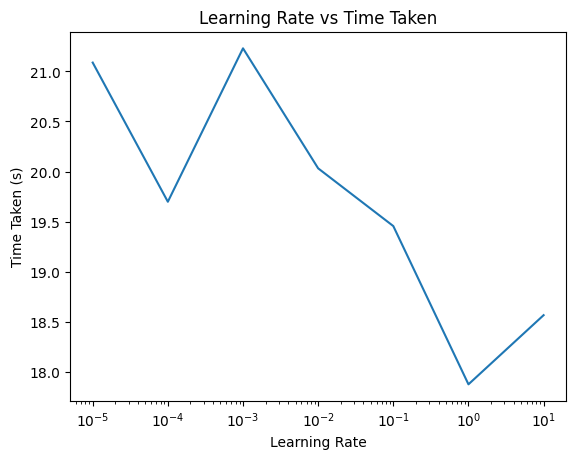

In [12]:
lr_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
time_list = []

perceptron_heaviside = Perceptron(input_size = 784, threshold = 0, activation_fn = heaviside)
for lr in lr_list:
    
    start = time.time()
    perceptron_heaviside.train(X_train, y_train, learning_rate=lr, num_epcohs=epochs)
    end = time.time()
    time_taken = end - start
    
    time_list.append(time_taken)
    
# plot a graph to show learning rate and time taken

plt.plot(lr_list, time_list)
plt.xlabel('Learning Rate')
plt.ylabel('Time Taken (s)')

# show the x labels as a log scale

plt.xscale('log')

plt.title('Learning Rate vs Time Taken')
plt.show()

Increasing learning rate decreases speed of learning and vice versa